# Data Exploration

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(path + "/heart.csv")

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Scatterplot Matrix

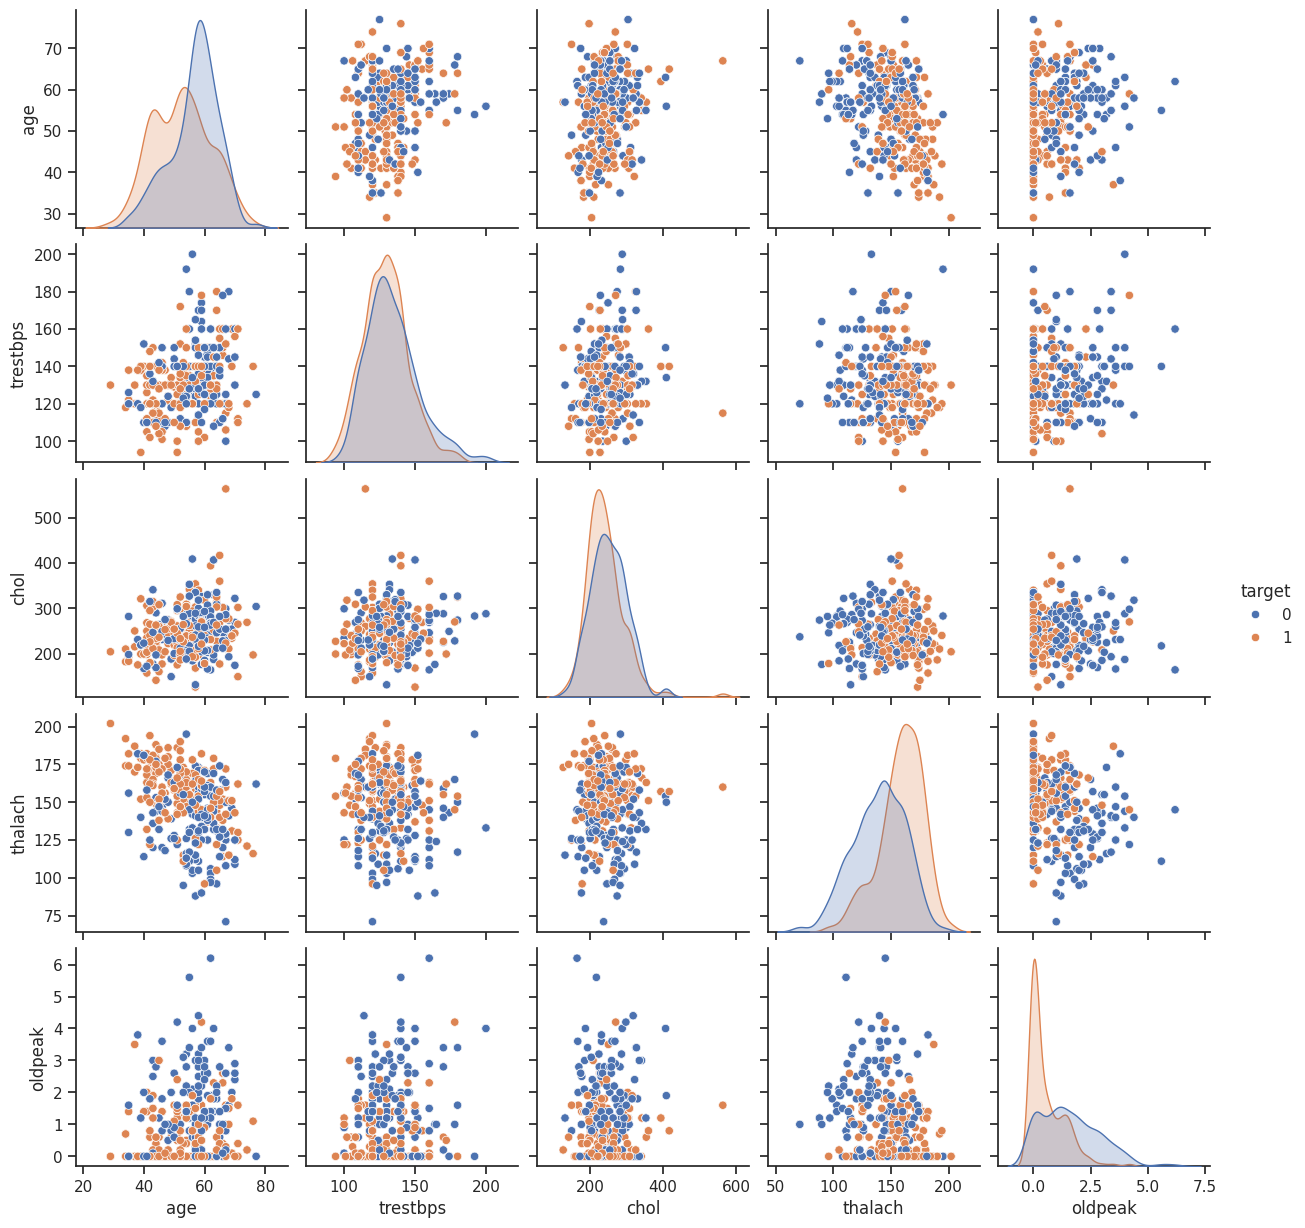

In [ ]:
sns.set_theme(style="ticks")

subset_df = df[["age", "trestbps", "chol", "thalach", "oldpeak", "target"]]

sns.pairplot(subset_df, hue="target")

## Correlation Matrix

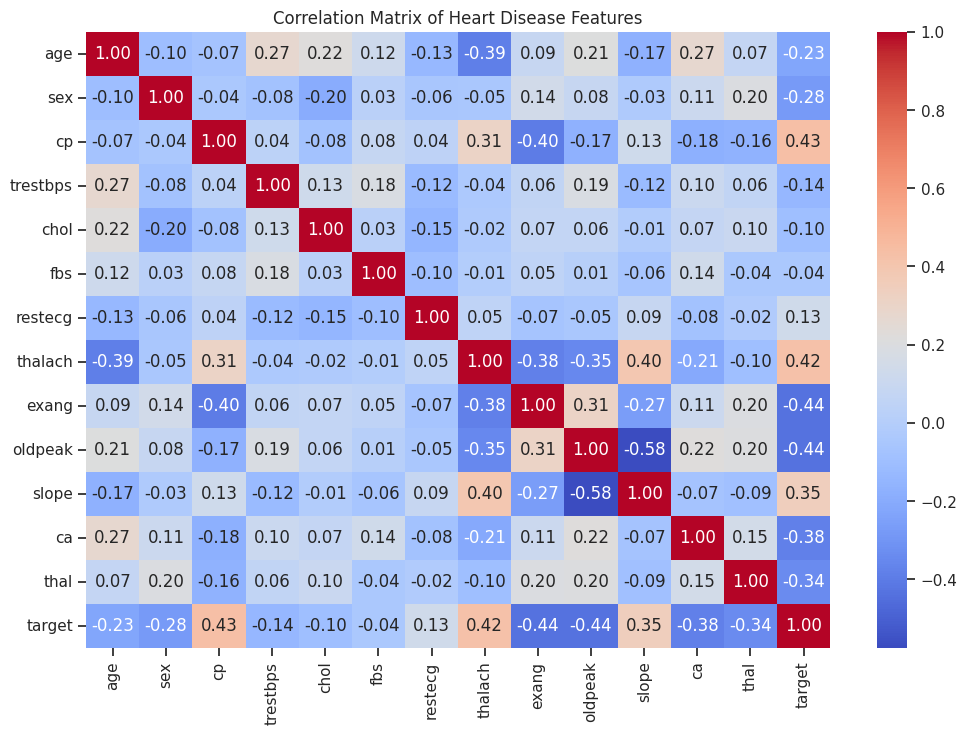

In [ ]:
corr_matrix = df.corr()

#HeatMap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

### **Strong Positive Correlations**

cp (chest pain type) and target (0.43): Suggests chest pain type is a strong indicator of heart disease.

thalach (maximum heart rate achieved) and target (0.42): Higher maximum heart rate seems associated with higher risk.

slope and thalach (maximum heart rate achieved) (0.40): The slope of the peak exercise ST segment appears positively correlated with heart disease.

### **Strong Negative Correlations**

oldpeak and slope (-0.58):

oldpeak and target (-0.44): Lower ST depression might be associated with higher heart disease risk.

exand and target (-0.44): Exercise-induced angina shows a negative correlation with heart disease risk.

## Bar Plot

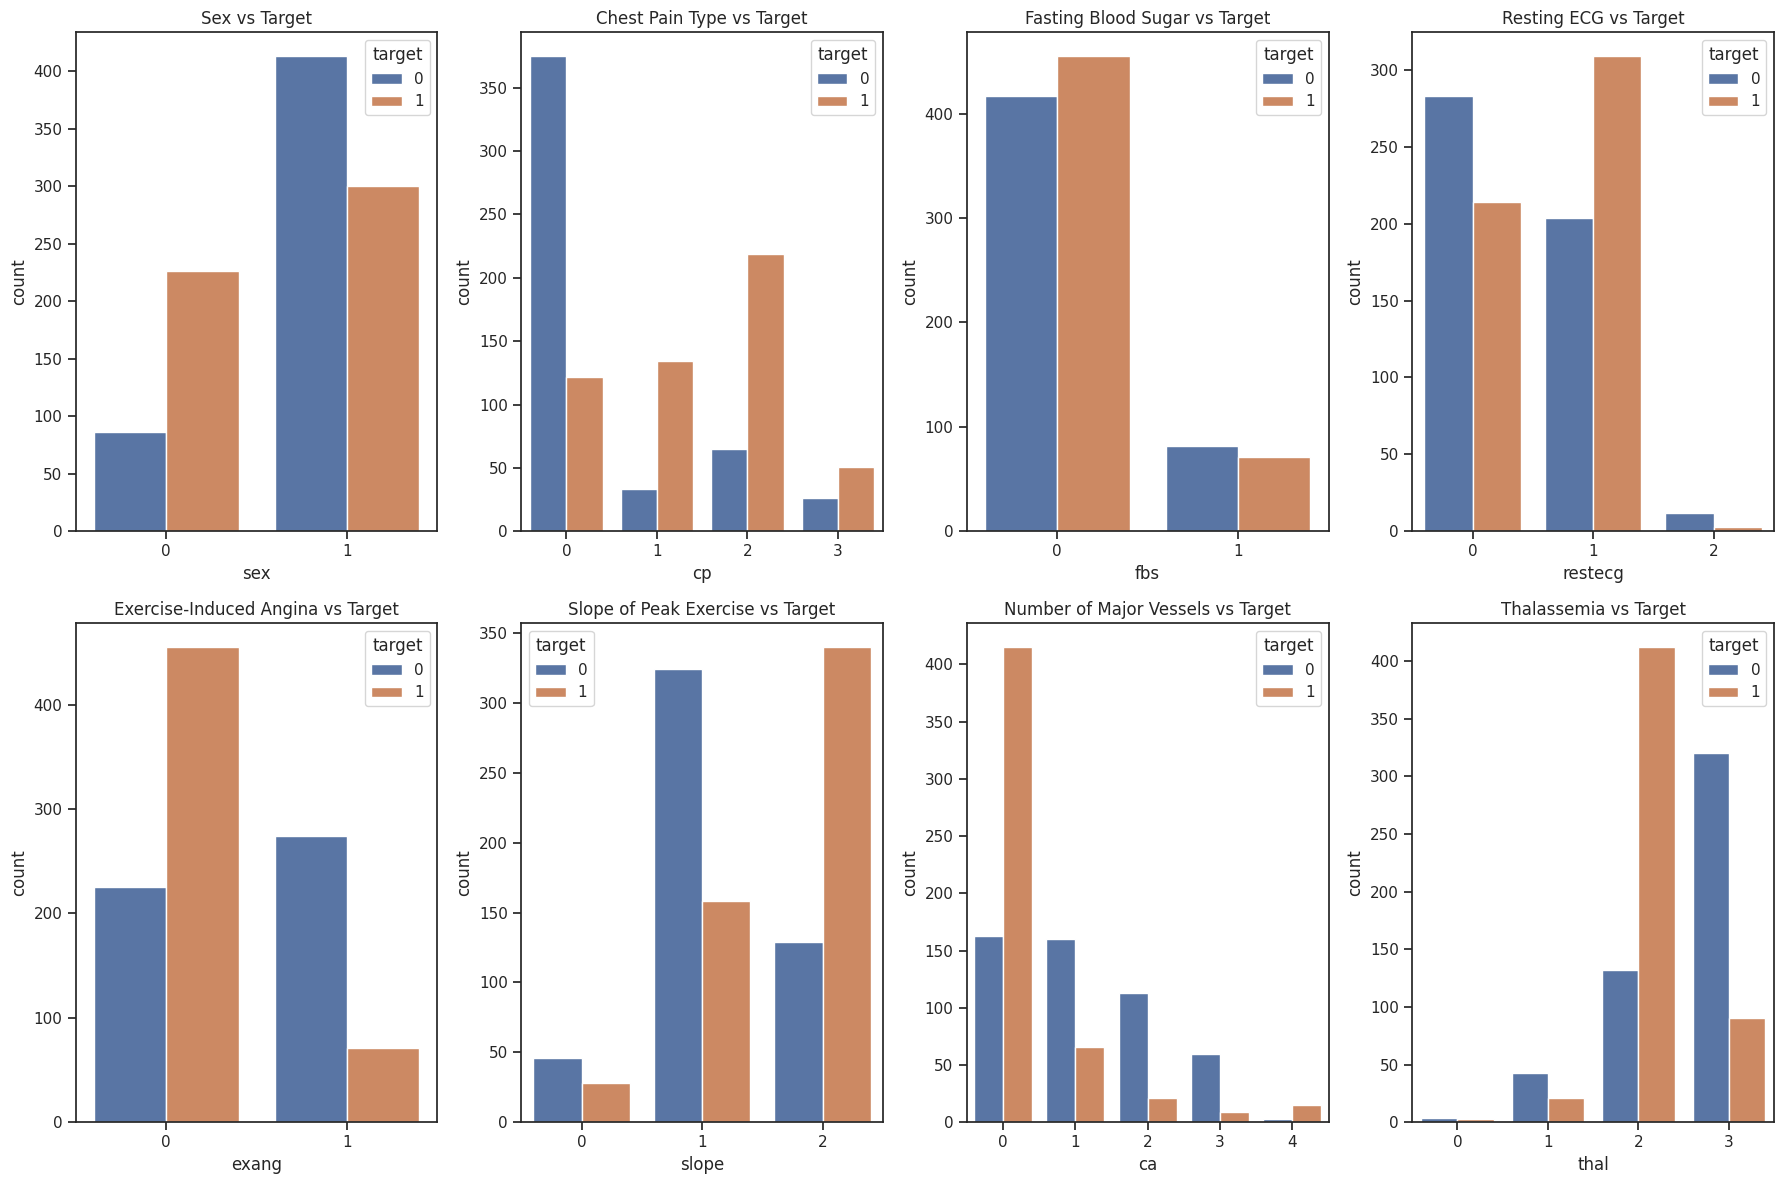

In [ ]:
# Adjust figure size for better spacing
plt.figure(figsize=(18, 12))

# Create the first subplot for 'sex'
plt.subplot(2, 4, 1)
sns.countplot(x='sex', hue='target', data=df)
plt.title('Sex vs Target')

# Create the second subplot for 'cp' (chest pain type)
plt.subplot(2, 4, 2)
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Target')

# Create the third subplot for 'fbs' (fasting blood sugar)
plt.subplot(2, 4, 3)
sns.countplot(x='fbs', hue='target', data=df)
plt.title('Fasting Blood Sugar vs Target')

# Create the fourth subplot for 'restecg' (resting ECG results)
plt.subplot(2, 4, 4)
sns.countplot(x='restecg', hue='target', data=df)
plt.title('Resting ECG vs Target')

# Create the fifth subplot for 'exang' (exercise-induced angina)
plt.subplot(2, 4, 5)
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise-Induced Angina vs Target')

# Create the sixth subplot for 'slope' (slope of peak exercise)
plt.subplot(2, 4, 6)
sns.countplot(x='slope', hue='target', data=df)
plt.title('Slope of Peak Exercise vs Target')

# Create the seventh subplot for 'ca' (number of major vessels)
plt.subplot(2, 4, 7)
sns.countplot(x='ca', hue='target', data=df)
plt.title('Number of Major Vessels vs Target')

# Create the eighth subplot for 'thal' (thalassemia)
plt.subplot(2, 4, 8)
sns.countplot(x='thal', hue='target', data=df)
plt.title('Thalassemia vs Target')

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

## Chi-square test

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Function to perform chi-square test and return the p-value
def chi_square_test(var, target):
    contingency_table = pd.crosstab(df[var], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# List of categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Loop through each categorical variable and perform the chi-square test
for var in categorical_vars:
    p_value = chi_square_test(var, 'target')
    print(f'{var.capitalize()}, p-value = {p_value:.4f}')

Sex, p-value = 0.0000
Cp, p-value = 0.0000
Fbs, p-value = 0.2186
Restecg, p-value = 0.0000
Exang, p-value = 0.0000
Slope, p-value = 0.0000
Ca, p-value = 0.0000
Thal, p-value = 0.0000


### Since the p-value of Fasting Blood Sugar, Fbs is greater than 0.05, it is not statistically significant

# Dimensionality Reduction

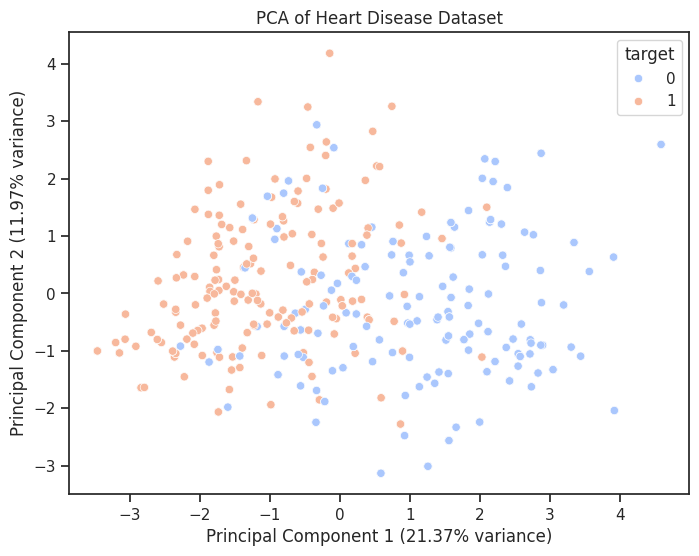

Explained variance by each component:  [0.21369912 0.11971959]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df.drop('target', axis=1)
target = df['target']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['target'] = target

# Visualize the PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='coolwarm')
plt.title('PCA of Heart Disease Dataset')
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.show()

# Explained variance
print("Explained variance by each component: ", pca.explained_variance_ratio_)


There are some overlap between the two classes (target = 0 and target = 1), indicating that these components alone do not fully separate individuals with and without heart disease.

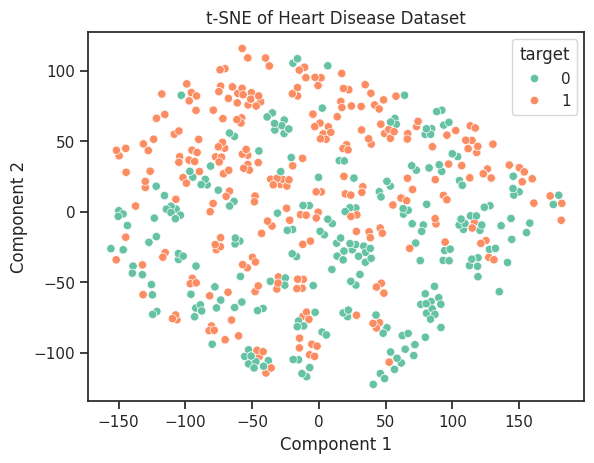

In [ ]:
from sklearn.manifold import TSNE


#Dimensionality Reduction using t-SNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded_tsne = tsne.fit_transform(features)

df_tsne = pd.DataFrame(data=X_embedded_tsne, columns=['Component 1', 'Component 2'])
df_tsne['target'] = target

# Plotting t-SNE results
sns.scatterplot(data=df_tsne, x='Component 1', y='Component 2', hue='target', palette='Set2')
plt.title('t-SNE of Heart Disease Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='target')
plt.show()

The t-SNE visualization has highlighted some local groupings, which might suggest potential clusters. However, the overlap between classes is still significant.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


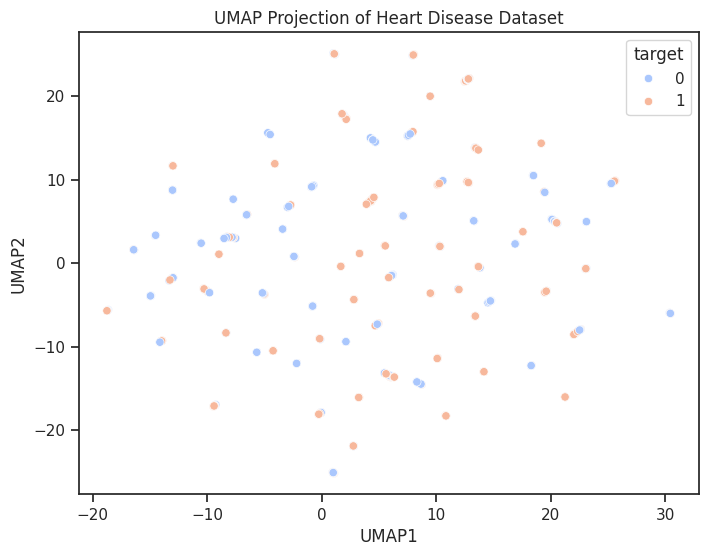

In [ ]:
!pip install umap-learn

import umap
# Apply UMAP to reduce to 2 dimensions
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_result = umap_model.fit_transform(features)

# Create a DataFrame for UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['target'] = target

# Plot UMAP results
plt.figure(figsize=(8,6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='target', data=umap_df, palette='coolwarm')
plt.title('UMAP Projection of Heart Disease Dataset')
plt.show()

The clusters are not very distinct, indicating that the separation between classes is not clear in this visualization. The UMAP may not have captured strong separable structures for these classes.

# Unsupervised Learning

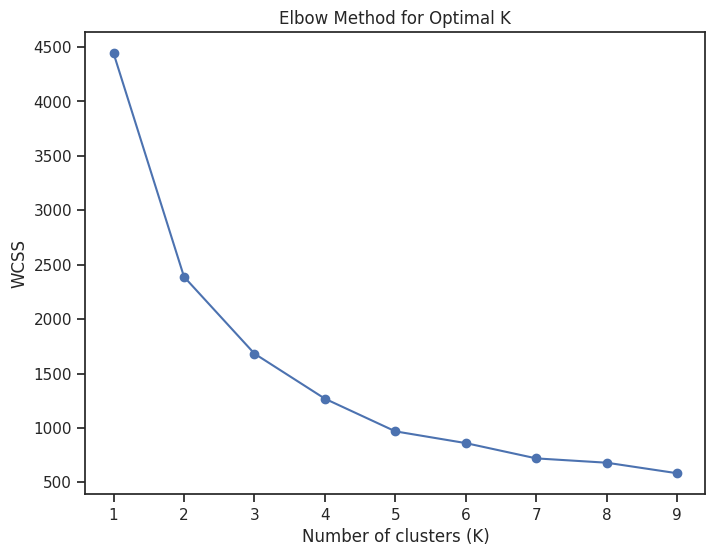

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#Applying Unsupervised Larning with K-Means
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Finding optimal number of k-clusters
plt.figure(figsize=(8,6))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

The "elbow" around K=3 or K=4 suggests these are optimal numbers of clusters. Beyond this point, adding more clusters yields diminishing returns in reducing WCSS (variance).

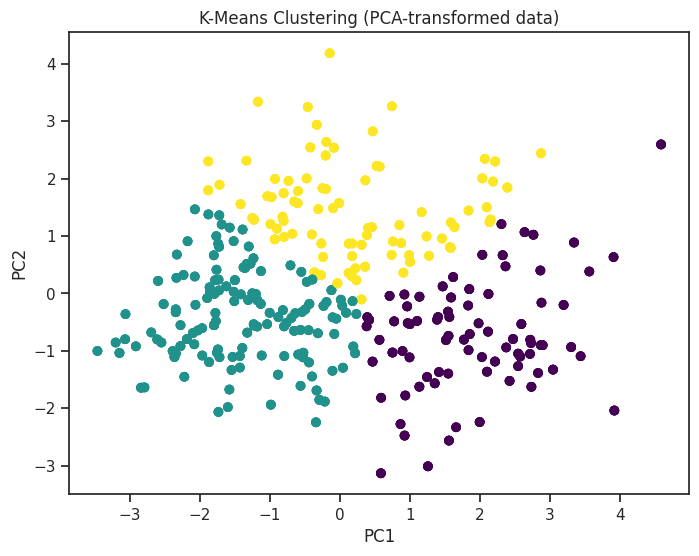

Silhouette Score for K-Means with 3 clusters: 0.39


In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering (PCA-transformed data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Calculate Silhouette Score to assess cluster quality
silhouette_avg = silhouette_score(pca_result, clusters)
print(f'Silhouette Score for K-Means with {optimal_k} clusters: {silhouette_avg:.2f}')

The clusters are not perfectly distinct, indicating some overlap. This suggests that while K-means has identified groupings, the separation is not clear-cut, reflecting the moderate silhouette score.

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X = scaled_features
y = target

#60-20-20
# Split the data into training and testing sets
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy}")

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# #Evaluating model
# scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# #Results
# print("Cross-validation scores:", scores)
# print("Mean accuracy:", np.mean(scores))
# print("Standard deviation:", np.std(scores))

Accuracy on validation set: 0.8195121951219512


# Hyperparameter Tuning

In [ ]:
param_grid_lr = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},  # For l1 penalty
    {'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # For l2 penalty
]

model_lr = LogisticRegression(max_iter=1000, random_state=42)

grid_search = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params_lr = grid_search.best_params_
best_model_lr = grid_search.best_estimator_

print("Best parameters for Logistic Regression:", best_params_lr)

y_pred_lr = best_model_lr.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f"Accuracy on validation set with Tuned Model: {accuracy_lr}")

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Accuracy on validation set with Tuned Model: 0.8195121951219512


The accuracy  from our Logistic model had a score of 0.82 which suggests that the model performs very well.

# Cross Validation

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model_lr, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.81300813 0.90243902 0.86178862 0.81300813 0.82926829]
Mean CV Score: 0.8439024390243903
Standard Deviation of CV Scores: 0.0342622886271634


The scores indicate consistent performance across each of the fice folds. They all have values above 0.81.

The mean accuracy suggests that the model performs well overall, with a score of 0.844.

A low standard deviation (0.034) also indicates that the model's performance is consistent across different subsets of the data.

In [ ]:
#Performance on Test Set

y_pred = best_model_lr.predict(X_test)

# Evaluate performance
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Test Set Accuracy: 0.8341463414634146
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       100
           1       0.81      0.89      0.85       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



# Performance Improvement

## Experiment 2

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

X_df = pd.DataFrame(X, columns=feature_names)

# Base model
model = RandomForestClassifier(random_state=42)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=8)  # Select top 8 features

rfe.fit(X_df, y)

selected_features = X_df.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')


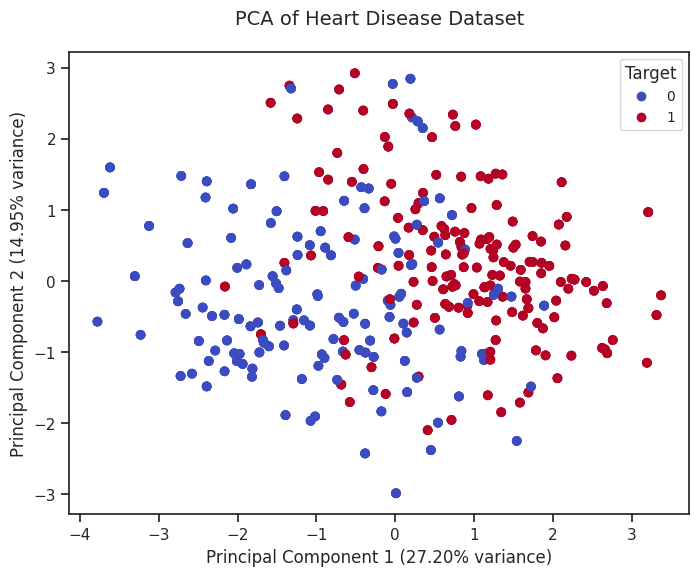

In [ ]:

X_selected = X_df[['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

#Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=y,
                     cmap='coolwarm',
                     )

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)',
          fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)',
          fontsize=12)
plt.title('PCA of Heart Disease Dataset',
         fontsize=14,
         pad=20)

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Target", fontsize=10)



Slight improvement in separation between classes and higher explained variance in PC1 (27.20%) and PC2 (14.95%) respectively.

An increase in the explained variance for both the first and second principal components suggests that the selected features have better captured the variance in the dataset than before

### K-Means Clustering

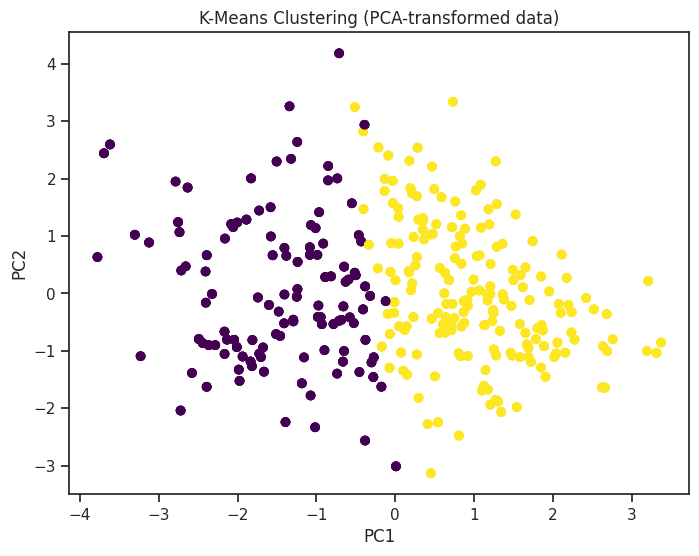

Silhouette Score for K-Means with 2 clusters: 0.41


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering (PCA-transformed data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Calculate Silhouette Score to assess cluster quality
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score for K-Means with 2 clusters: {silhouette_avg:.2f}')

Thee data points show slightly better-defined groupings, indicating that fewer clusters may capture the overall structure more cohesively.

The overlap between groups is reduced, though still present.

### Random Forest Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Split into Train Val Test
X_train, X_rem, y_train, y_rem = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy}")

Accuracy on validation set: 0.9853658536585366


The Random Forest model demonstrated exceptional performance on the validation set, achieving an accuracy of 98.54%

It showed significant improvement compared to the earlier Logistic Regression model's validation accuracy of 81.95%.

In [ ]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate with the best model
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_val)
best_test_accuracy = accuracy_score(y_val, y_pred_best)
print("Tuned Val Set Accuracy:", best_test_accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Val Set Accuracy: 0.9951219512195122


The near-perfect accuracy suggests that the Random Forest model has an excellent grasp of the data's patterns, as well as benefiting from the feature selection and parameter tuning done earlier.

### Cross Validation Scores

In [ ]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.94308943 0.99186992 0.94308943 0.96747967 0.93495935]
Mean CV Score: 0.9560975609756097


The cross-validation scores show consistent and strong performance across the folds, with values ranging from 0.935 to 0.992. The mean cross-validation score is 95.61%, indicating that the Random Forest model generalizes well across different subsets of the training data.

In [ ]:
#Performance on Test Set

y_pred = best_rf_model.predict(X_test)

# Evaluate performance
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Set Accuracy: 0.9902439024390244
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.98      0.99       109

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



The model, fine-tuned with the optimal parameters, demonstrates exceptional classification performance on unseen data. The precision and recall values for both classes suggest the model is reliable in detecting heart disease while minimizing misclassifications.

Its ability to generalize effectively from the training and validation sets to the test set further validates the robustness of the feature selection process and hyperparameter tuning efforts.

In [ ]:
import pandas as pd

# Feature importance
feature_importances = pd.DataFrame({'Feature': X_selected.columns,
                                    'Importance': rf_model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))


    Feature  Importance
5   oldpeak    0.156927
1        cp    0.154013
7      thal    0.136969
4   thalach    0.132920
6        ca    0.112021
0       age    0.108776
3      chol    0.103982
2  trestbps    0.094392


## Experiment 3

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Split into Train Val Test
X_train, X_rem, y_train, y_rem = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy}")

Accuracy on validation set: 0.9658536585365853


In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Grid Search
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)

print("Best Parameters:", gb_grid.best_params_)

best_gb_model = gb_grid.best_estimator_
y_pred_best = best_gb_model.predict(X_val)
best_test_accuracy = accuracy_score(y_val, y_pred_best)
print("Tuned Val Set Accuracy:", best_test_accuracy)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
Tuned Val Set Accuracy: 0.9707317073170731


In [ ]:
cv_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.93495935 1.         0.95121951 0.96747967 0.91056911]
Mean CV Score: 0.9528455284552845


In [ ]:
#Performance on Test Set

y_pred = best_gb_model.predict(X_test)

# Evaluate performance
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Set Accuracy: 0.975609756097561
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        96
           1       0.99      0.96      0.98       109

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

